In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("../dataset/이자보상배율최종.csv", encoding='cp949')
backtest_2011=pd.read_csv("../년도별 주식데이터/2011년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2012=pd.read_csv("../년도별 주식데이터/2012년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2013=pd.read_csv("../년도별 주식데이터/2013년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2014=pd.read_csv("../년도별 주식데이터/2014년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2015=pd.read_csv("../년도별 주식데이터/2015년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2016=pd.read_csv("../년도별 주식데이터/2016년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2017=pd.read_csv("../년도별 주식데이터/2017년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2018=pd.read_csv("../년도별 주식데이터/2018년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2019=pd.read_csv("../년도별 주식데이터/2019년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2020=pd.read_csv("../년도별 주식데이터/2020년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_kosdak=pd.read_csv("../년도별 주식데이터/코스닥주가.csv", encoding='cp949') 

In [4]:
for i in data.index:
    data.loc[i,"회계년도"]=data.loc[i,"회계년도"].replace('-12-', '-04-')
    data.loc[i,"상장일"]=data.loc[i,"상장일"].replace('-',"")
 
data.rename(columns={'회계년도':'투자일자'},inplace=True)
data

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,흥구석유(주),24060,2016-04-01,19941207,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10648,흥구석유(주),24060,2017-04-01,19941207,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10649,흥구석유(주),24060,2018-04-01,19941207,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10650,흥구석유(주),24060,2019-04-01,19941207,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [5]:
#logit 피처선정별 종류의 피처
data_mda = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]1주당순이익', '[제조]총자본투자효율','[제조]부가가치', '[제조]매출액순이익률', 
                 '[제조]자기자본배율', '[제조]총자본증가율','[제조]유형자산증가율',"[제조]유동비율",'[제조]비유동자산회전률','[제조]매입채무회전률' ]]
data_logit=data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)']]
data_lasso = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율','[제조]매출액순이익률',
                '[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_elastic = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율',
                     '[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_same = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]노동소득분배율','[제조]자기자본배율','[제조]현금비율','[제조]자기자본증가율',
                  '[제조]총자본증가율','[제조]재고자산증가율','[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]순운전자본회전률']]

In [6]:
# 투자 조건에 맞는 기업들을 오름차순 정렬
data_logit =data_logit.sort_values("[제조]현금비율", ascending=False)
data_logit

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
1365,(주)메지온,140410,2013-04-01,20120120,NaN,연구개발업,5,-5.89,-0.88,544.87,0.69,0.00,0.07,21837.41,1539.14,4128.42,-25.175
3846,(주)엔케이맥스,182400,2016-04-01,20151023,NaN,의료용 물질 및 의약품 제조업,5,108.57,-15.55,614.76,0.90,6.43,0.16,4473.43,714.15,710.54,-196.540
5503,(주)지놈앤컴퍼니,314130,2020-04-01,20201223,NaN,의료용 물질 및 의약품 제조업,5,243.56,-33.98,13.87,0.02,0.00,0.00,3456.01,1611.96,0.00,-21.540
6585,(주)티앤알바이오팹,246710,2018-04-01,20181128,NaN,의료용 물질 및 의약품 제조업,5,228.56,-23.19,150.46,0.89,8.92,0.05,3192.85,743.48,0.00,-1435.680
5501,(주)지노믹트리,228760,2019-04-01,20190327,NaN,의료용 물질 및 의약품 제조업,5,715.02,-4.27,14.09,0.02,6.96,0.00,2930.50,1089.95,0.00,-7.440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7844,대동금속(주),20400,2014-04-01,19930730,NaN,1차 금속 제조업,5,18.49,2.15,126090.43,1.67,6.85,1.49,0.01,738.99,70.69,1.470
9533,원풍물산(주),8290,2013-04-01,19970718,NaN,"의복, 의복 액세서리 및 모피제품 제조업",6,9.11,3.65,1487.70,1.92,5.98,0.81,0.01,140.14,38.07,1.430
968,(주)디에이피,66900,2011-04-01,20040514,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",5,34.88,4.36,9339.72,1.61,10.91,1.71,0.01,483.29,54.07,1.870
7845,대동금속(주),20400,2015-04-01,19930730,NaN,1차 금속 제조업,5,13.37,3.41,124631.21,1.36,6.46,1.41,0.01,1123.36,67.83,3.000


In [7]:
# 년도별로 분류
data_logit_2011 = data_logit[data_logit["투자일자"]=='2011-04-01']
data_logit_2012 = data_logit[data_logit["투자일자"]=='2012-04-01']
data_logit_2012["투자일자"] = "2012-04-02"
data_logit_2013 = data_logit[data_logit["투자일자"]=='2013-04-01']
data_logit_2014 = data_logit[data_logit["투자일자"]=='2014-04-01']
data_logit_2015 = data_logit[data_logit["투자일자"]=='2015-04-01']
data_logit_2016 = data_logit[data_logit["투자일자"]=='2016-04-01']
data_logit_2017 = data_logit[data_logit["투자일자"]=='2017-04-01']
data_logit_2017["투자일자"] = "2017-04-03"
data_logit_2018 = data_logit[data_logit["투자일자"]=='2018-04-01']
data_logit_2018["투자일자"] = "2018-04-02"
data_logit_2019 = data_logit[data_logit["투자일자"]=='2019-04-01']
data_logit_2020 = data_logit[data_logit["투자일자"]=='2020-04-01']


c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\Users\김성휘\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying 

In [8]:
data_logit_2011_buy=data_logit_2011[data_logit_2011["상장일"]<='20110401']
data_logit_2012_buy=data_logit_2012[data_logit_2012["상장일"]<='20120401']
data_logit_2013_buy=data_logit_2013[data_logit_2013["상장일"]<='20130401']
data_logit_2014_buy=data_logit_2014[data_logit_2014["상장일"]<='20140401']
data_logit_2015_buy=data_logit_2015[data_logit_2015["상장일"]<='20150401']
data_logit_2016_buy=data_logit_2016[data_logit_2016["상장일"]<='20160401']
data_logit_2017_buy=data_logit_2017[data_logit_2017["상장일"]<='20170401']
data_logit_2018_buy=data_logit_2018[data_logit_2018["상장일"]<='20180401']
data_logit_2019_buy=data_logit_2019[data_logit_2019["상장일"]<='20190401']
data_logit_2020_buy=data_logit_2020[data_logit_2020["상장일"]<='20200401']


In [9]:
# 해당기업 순위 20위 추출
data_logit_2011_buy=data_logit_2011_buy[:20]
data_logit_2012_buy=data_logit_2012_buy[:20]
data_logit_2013_buy=data_logit_2013_buy[:20]
data_logit_2014_buy=data_logit_2014_buy[:20]
data_logit_2015_buy=data_logit_2015_buy[:20]
data_logit_2016_buy=data_logit_2016_buy[:20]
data_logit_2017_buy=data_logit_2017_buy[:20]
data_logit_2018_buy=data_logit_2018_buy[:20]
data_logit_2019_buy=data_logit_2019_buy[:20]
data_logit_2020_buy=data_logit_2020_buy[:20]

In [10]:
#트레이드 조건 주기
data_logit_2011_buy["trade"]="buy"
data_logit_2012_buy["trade"]="buy"
data_logit_2013_buy["trade"]="buy"
data_logit_2014_buy["trade"]="buy"
data_logit_2015_buy["trade"]="buy"
data_logit_2016_buy["trade"]="buy"
data_logit_2017_buy["trade"]="buy"
data_logit_2018_buy["trade"]="buy"
data_logit_2019_buy["trade"]="buy"
data_logit_2020_buy["trade"]="buy"

In [11]:
data_logit_2011

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
9549,위즈코프(주),38620,2011-04-01,20000504,NaN,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",5,-22.97,-8.63,409.65,2.11,49.93,0.42,2745.25,223.41,0.00,5.425714e+00
10191,키네마스터(주),139670,2011-04-01,20111202,NaN,출판업,5,47.66,21.06,1814.33,9.59,3.40,0.73,1102.54,512.85,81.98,3.120979e+06
520,(주)다나와,119860,2011-04-01,20110124,NaN,출판업,5,87.71,13.86,3207.24,2.48,8.97,0.73,1028.88,1336.77,60.49,5.345200e+02
2409,(주)스마트솔루션즈,136510,2011-04-01,20111118,NaN,기타 기계 및 장비 제조업,6,55.18,19.64,3684.53,3.47,4.22,0.62,926.00,1526.56,38.37,2.095510e+03
960,(주)디에이치패션,45260,2011-04-01,20011108,2012-08-01,도매 및 상품 중개업,4,-12.15,-10.89,81.14,0.16,3.44,0.32,704.07,116.41,0.00,-6.600000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,메디앙스(주),14100,2011-04-01,19950103,NaN,화학물질 및 화학제품 제조업; 의약품 제외,5,1.84,-2.66,18172.09,6.34,7.39,1.97,0.08,689.95,81.72,-3.190000e+00
8454,삼보산업(주),9620,2011-04-01,19931207,NaN,1차 금속 제조업,5,19.51,4.37,217331.97,6.05,5.97,1.75,0.07,3540.81,39.86,1.130000e+00
6203,(주)코아에스앤아이,52350,2011-04-01,20010720,2012-04-17,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",4,-69.30,-75.75,874.42,0.40,17.22,0.59,0.05,223.22,0.00,-4.493653e+06
1771,(주)비엔씨컴퍼니,58370,2011-04-01,20020219,2017-05-08,기타 기계 및 장비 제조업,4,-8.35,9.79,814.56,2.17,4.61,1.34,0.01,100.22,9.22,1.120000e+00


In [12]:
stock_2011 = pd.merge(backtest_2011,data_logit_2011_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2012 = pd.merge(backtest_2012,data_logit_2012_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2013 = pd.merge(backtest_2013,data_logit_2013_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2014 = pd.merge(backtest_2014,data_logit_2014_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2015 = pd.merge(backtest_2015,data_logit_2015_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2016 = pd.merge(backtest_2016,data_logit_2016_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2017 = pd.merge(backtest_2017,data_logit_2017_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2018 = pd.merge(backtest_2018,data_logit_2018_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2019 = pd.merge(backtest_2019,data_logit_2019_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2020 = pd.merge(backtest_2020,data_logit_2020_buy, how='left',on=['회사명','투자일자','거래소코드'])

In [13]:
stock_2020[stock_2020["trade"]=="buy"]["회사명"].unique()
# stock_2020[stock_2020["trade"]=="buy"]

array(['(주)넥스턴바이오사이언스', '(주)로보티즈', '(주)삼일기업공사', '(주)세운메디칼', '(주)셀리버리',
       '(주)싸이토젠', '(주)에이프로젠헬스케어앤게임즈', '(주)인포바인', '(주)지노믹트리', '(주)티앤알바이오팹',
       '(주)파나진', '(주)한창바이오텍', '(주)핸디소프트', '브릿지바이오테라퓨틱스(주)', '세명전기공업(주)',
       '압타바이오(주)', '와토스코리아(주)', '이스트아시아홀딩스인베스트먼트리미티드', '키네마스터(주)',
       '피에스텍(주)'], dtype=object)

In [14]:
list =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]
list_grn =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]


In [15]:
for i in range(len(list)):
    for j in list[i].index:
        if j>0:
            if list[i].loc[j-1,"trade"] == "buy":
                list[i].loc[j,"trade"] = "hold"
            elif  list[i].loc[j-1,"trade"] == "hold":
                if list[i].iloc[:,1][j] == list[i].iloc[:,1][j-1]:
                    list[i].loc[j,"trade"] = "hold"
                elif list[i].iloc[:,1][j] != list[i].iloc[:,1][j-1]:
                    list[i].loc[j-1,"trade"] = "sell"
                if j== list[i].tail(n=1).index:
                    list[i].loc[j,"trade"] = "sell"
                        
for i in range(len(list)):
    list[i] = list[i][["회사명","거래소코드","투자일자","종가","일일수익률","trade"]]
    list[i] = list[i].dropna()
    list[i] = list[i].sort_values('투자일자', ascending=True)
    list[i] = list[i].reset_index(drop='index')
    list[i] = list[i].groupby("투자일자")["일일수익률"].sum()/20

In [16]:
# acc_rtn2= 1
# for i in range(len(list)):
#     list[i]=list[i].reset_index()
#     for j in list[i].index:
        
#         list[i].loc[j,"연누적수익률"] = acc_rtn2*list[i].loc[j,"일일수익률"]
#         acc_rtn2 = list[i].loc[j,"연누적수익률"]

In [17]:
stock_2011[stock_2011["trade"]=="sell"]

,index,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,...,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
3215,284856,(주)국순당,43650,2012-03-30,9350,0.007217,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
10192,284948,(주)다나와,119860,2012-03-30,4409,-0.011435,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
19311,284825,(주)디에이치패션,45260,2012-03-30,398,-0.149573,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
26991,285013,(주)메디프론디비티,65650,2012-03-30,6633,-0.017333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
50603,284459,(주)스카이문스테크놀로지,33790,2012-03-30,2050,0.019900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
57598,284278,(주)씨젠,96530,2012-03-30,18866,0.043243,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
58598,284923,(주)아나패스,123860,2012-03-30,13150,0.069106,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
83374,284993,(주)엘엑스세미콘,108320,2012-03-30,33950,0.013433,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
97153,284796,(주)위메이드맥스,101730,2012-03-30,13907,0.006368,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
105328,284805,(주)이수앱지스,86890,2012-03-30,7487,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell


In [18]:
#각 년도별 수익률 합치기
rtn =pd.concat(list)
rtn = pd.DataFrame(rtn)

In [19]:
#리밸런싱 날짜는 수익률 반영을 못하므로 제거
rtn["일일수익률"] =rtn["일일수익률"]*100
rtn =rtn.drop(index=["2011-04-01","2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
stock_rtn=rtn.reset_index()

In [20]:
stock_rtn=rtn.reset_index()
stock_rtn.columns=["투자일자","일일수익률(%)"]
stock_rtn["일일수익률"] =(stock_rtn["일일수익률(%)"]/100) +1
stock_rtn

,투자일자,일일수익률(%),일일수익률
0,2011-04-04,0.351810,1.003518
1,2011-04-05,0.809918,1.008099
2,2011-04-06,1.508387,1.015084
3,2011-04-07,0.153979,1.001540
4,2011-04-08,-0.054824,0.999452
...,...,...,...
2448,2021-03-25,1.416671,1.014167
2449,2021-03-26,0.295013,1.002950
2450,2021-03-29,0.100684,1.001007
2451,2021-03-30,-0.988974,0.990110


In [21]:
# stock_rtn[stock_rtn["투자일자"]=='2012-03-30']248
# stock_rtn[stock_rtn["투자일자"]=='2013-03-29'] 494
# stock_rtn[stock_rtn["투자일자"]=='2014-03-31'] 740
# stock_rtn[stock_rtn["투자일자"]=='2015-03-31'] 983
# stock_rtn[stock_rtn["투자일자"]=='2016-03-31'] 1230
# stock_rtn[stock_rtn["투자일자"]=='2017-03-31'] 1477
# stock_rtn[stock_rtn["투자일자"]=='2018-03-30'] 1718
# stock_rtn[stock_rtn["투자일자"]=='2019-03-29'] 1959
# stock_rtn[stock_rtn["투자일자"]=='2020-03-31'] 2207
# stock_rtn[stock_rtn["투자일자"]=='2021-03-31'] 2452


In [22]:
acc_rtn=1
for i in stock_rtn.index:
    
    stock_rtn.loc[i,"누적수익률"] = acc_rtn*stock_rtn.loc[i,"일일수익률"]
    acc_rtn = stock_rtn.loc[i,"누적수익률"]
        

acc_rtn_1 = 1
for i in stock_rtn.index:
    if i <= 248:
        
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_1*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_1 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 1
        
acc_rtn_2 = 1
for i in stock_rtn.index:
    if 248 < i <= 494:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_2*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_2 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 2
        
acc_rtn_3 = 1        
for i in stock_rtn.index:
    if  494< i <=740:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_3*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_3 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 3
        
acc_rtn_4 = 1       
for i in stock_rtn.index:
    if 740 < i <= 983:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_4*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_4 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 4
        
acc_rtn_5 = 1       
for i in stock_rtn.index:
    if  983< i <= 1230:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_5*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_5 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 5

acc_rtn_6 = 1
for i in stock_rtn.index:
    if 1230 < i <= 1477:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_6*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_6 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 6
        
acc_rtn_7 = 1
for i in stock_rtn.index:
    if 1477 < i <= 1718:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_7*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_7 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 7

acc_rtn_8 = 1
for i in stock_rtn.index:
    if 1718 < i <= 1959:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_8*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_8 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 8   
             
acc_rtn_9 = 1      
for i in stock_rtn.index:
    if 1959 < i <= 2207:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_9*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_9 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 9
        
acc_rtn_10 = 1       
for i in stock_rtn.index:
    if 2207 < i <= 2452:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_10*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_10 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 10
    

In [23]:
#코스닥 시작 데이터 61
# backtest_kosdak[backtest_kosdak["날짜"]=="2011-04-04"]
#코스닥 마지막 데이터 2522
#backtest_kosdak[backtest_kosdak["날짜"]=="2021-03-31"]

In [24]:
#코스닥 데이터 끌고오기
backtest_kosdak_buy= backtest_kosdak[61:2523]
backtest_kosdak_rtn = backtest_kosdak_buy.set_index("날짜")

In [25]:
backtest_kosdak_rtn =backtest_kosdak_rtn.drop(index=["2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
backtest_kosdak_rtn=backtest_kosdak_rtn.reset_index()

In [26]:
backtest_kosdak_rtn.columns = ["투자일자","코스닥종가","시가총액","코스닥수익률","코스닥시총수익률"]

In [27]:
#주식수익률과 코스닥 merge
stock_rtn_all = pd.merge(stock_rtn,backtest_kosdak_rtn,how="left",on="투자일자")


In [28]:
stock_rtn_all["코스닥수익률"]=stock_rtn_all["코스닥수익률"]*100


In [29]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률
0,2011-04-04,0.351810,1.003518,1.003518,1.003518,1.0,534.90,105835314871792,0.533774,0.005763
1,2011-04-05,0.809918,1.008099,1.011646,1.011646,1.0,537.66,106138352312272,0.515984,0.002863
2,2011-04-06,1.508387,1.015084,1.026905,1.026905,1.0,533.98,105387016008919,-0.684447,-0.007079
3,2011-04-07,0.153979,1.001540,1.028487,1.028487,1.0,534.97,105571037939827,0.185400,0.001746
4,2011-04-08,-0.054824,0.999452,1.027923,1.027923,1.0,534.20,105439281631189,-0.143933,-0.001248
...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,1.416671,1.014167,4.806991,2.271113,10.0,954.99,387311921085308,0.122665,0.001147
2449,2021-03-26,0.295013,1.002950,4.821172,2.277813,10.0,956.70,388051677647507,0.179059,0.001910
2450,2021-03-29,0.100684,1.001007,4.826026,2.280106,10.0,954.10,386977420485060,-0.271768,-0.002768
2451,2021-03-30,-0.988974,0.990110,4.778298,2.257557,10.0,958.06,388660278311558,0.415051,0.004349


In [30]:

stock_rtn_all["코스닥수익률(%)"]= stock_rtn_all["코스닥수익률"]
stock_rtn_all["코스닥일일수익률"] =(stock_rtn_all["코스닥수익률(%)"]/100) +1
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률
0,2011-04-04,0.351810,1.003518,1.003518,1.003518,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338
1,2011-04-05,0.809918,1.008099,1.011646,1.011646,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160
2,2011-04-06,1.508387,1.015084,1.026905,1.026905,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156
3,2011-04-07,0.153979,1.001540,1.028487,1.028487,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854
4,2011-04-08,-0.054824,0.999452,1.027923,1.027923,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,1.416671,1.014167,4.806991,2.271113,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227
2449,2021-03-26,0.295013,1.002950,4.821172,2.277813,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791
2450,2021-03-29,0.100684,1.001007,4.826026,2.280106,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282
2451,2021-03-30,-0.988974,0.990110,4.778298,2.257557,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151


In [31]:
acc_rtn=1
for i in stock_rtn_all.index:
    
    stock_rtn_all.loc[i,'코스닥누적수익률'] = acc_rtn*stock_rtn_all.loc[i,"코스닥일일수익률"]
    acc_rtn = stock_rtn_all.loc[i,"코스닥누적수익률"]
    
    
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률
0,2011-04-04,0.351810,1.003518,1.003518,1.003518,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338
1,2011-04-05,0.809918,1.008099,1.011646,1.011646,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525
2,2011-04-06,1.508387,1.015084,1.026905,1.026905,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609
3,2011-04-07,0.153979,1.001540,1.028487,1.028487,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469
4,2011-04-08,-0.054824,0.999452,1.027923,1.027923,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,1.416671,1.014167,4.806991,2.271113,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700
2449,2021-03-26,0.295013,1.002950,4.821172,2.277813,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883
2450,2021-03-29,0.100684,1.001007,4.826026,2.280106,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043
2451,2021-03-30,-0.988974,0.990110,4.778298,2.257557,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415


In [32]:

for i in stock_rtn_all.index:
    if stock_rtn_all.iloc[:,5][i] == 1:
        stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥누적수익률"]
        
    elif stock_rtn_all.iloc[:,5][i] != 1:
        if stock_rtn_all.iloc[:,5][i] == stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i-1,"코스닥연누적수익률"]*stock_rtn_all.loc[i,"코스닥일일수익률"]
            
        elif stock_rtn_all.iloc[:,5][i] != stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥일일수익률"]
            
                

    

In [33]:
stock_rtn_all.iloc[:,5]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2448    10.0
2449    10.0
2450    10.0
2451    10.0
2452    10.0
Name: 투자연차, Length: 2453, dtype: float64

In [34]:
stock_rtn_all[490:505]

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률,코스닥연누적수익률
490,2013-03-25,-1.289089,0.987109,1.414221,1.155808,2.0,549.56,122836307769308,-0.306576,-0.002275,-0.306576,0.996934,1.028457,1.053200
491,2013-03-26,1.034315,1.010343,1.428849,1.167763,2.0,549.90,122920014052292,0.061868,0.000681,0.061868,1.000619,1.029093,1.053852
492,2013-03-27,1.461108,1.014611,1.449726,1.184825,2.0,548.72,122659767622917,-0.214584,-0.002117,-0.214584,0.997854,1.026885,1.051591
493,2013-03-28,0.434445,1.004344,1.456024,1.189972,2.0,552.64,123537571806713,0.714390,0.007156,0.714390,1.007144,1.034221,1.059103
494,2013-03-29,0.261080,1.002611,1.459825,1.193079,2.0,555.02,124020587600936,0.430660,0.003910,0.430660,1.004307,1.038675,1.063664
495,2013-04-02,-0.194591,0.998054,1.456985,0.998054,3.0,552.83,123545583208574,-0.205787,-0.002124,-0.205787,0.997942,1.036537,0.997942
496,2013-04-03,-0.015272,0.999847,1.456762,0.997902,3.0,557.96,124727364942628,0.927953,0.009566,0.927953,1.009280,1.046156,1.007203
497,2013-04-04,-1.485140,0.985149,1.435127,0.983081,3.0,555.23,124124104831224,-0.489282,-0.004837,-0.489282,0.995107,1.041037,1.002274
498,2013-04-05,-2.475827,0.975242,1.399596,0.958742,3.0,547.51,122387758967786,-1.390415,-0.013989,-1.390415,0.986096,1.026563,0.988339
499,2013-04-08,-3.141589,0.968584,1.355626,0.928622,3.0,528.78,118098161236530,-3.420942,-0.035049,-3.420942,0.965791,0.991445,0.954528


In [35]:
stock_rtn_all["코스닥연누적수익률(%)"]=(stock_rtn_all["코스닥연누적수익률"]-1)*100
stock_rtn_all["누적수익률(%)"]= (stock_rtn_all["누적수익률"]-1)*100
stock_rtn_all["코스닥누적수익률(%)"]= (stock_rtn_all["코스닥누적수익률"]-1)*100
stock_rtn_all["연누적수익률(%)"]= (stock_rtn_all["연누적수익률"]-1)*100


In [36]:
stock_rtn_all =stock_rtn_all[['투자일자', '일일수익률(%)',"누적수익률(%)","연누적수익률(%)", '코스닥종가', '코스닥수익률(%)', '코스닥누적수익률(%)',"코스닥연누적수익률(%)",'투자연차']]


In [37]:
stock_rtn_all

,투자일자,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
0,2011-04-04,0.351810,0.351810,0.351810,534.90,0.533774,0.533774,0.533774,1.0
1,2011-04-05,0.809918,1.164577,1.164577,537.66,0.515984,1.052513,1.052513,1.0
2,2011-04-06,1.508387,2.690530,2.690530,533.98,-0.684447,0.360862,0.360862,1.0
3,2011-04-07,0.153979,2.848652,2.848652,534.97,0.185400,0.546931,0.546931,1.0
4,2011-04-08,-0.054824,2.792266,2.792266,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,1.416671,380.699077,127.111277,954.99,0.122665,77.769983,73.055596,10.0
2449,2021-03-26,0.295013,382.117200,127.781284,956.70,0.179059,78.088297,73.365468,10.0
2450,2021-03-29,0.100684,382.602616,128.010624,954.10,-0.271768,77.604311,72.894317,10.0
2451,2021-03-30,-0.988974,377.829803,125.755659,958.06,0.415051,78.341459,73.611916,10.0


In [38]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stock_rtn_all["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stock_rtn_all["일일수익률(%)"] - stock_rtn_all["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print( 'Sharpe ratio: %.2f' % Sharpe )

Sharpe ratio: 0.03


In [39]:
Sharpe *np.sqrt(252)

0.4386003611086042

In [40]:
#mdd 
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.8326770664887255

In [41]:
cagr = (stock_rtn_all
        ["누적수익률(%)"]**(1/10))-1
print(cagr*100)


0       -9.919503
1        1.535243
2       10.403740
3       11.036032
4       10.814266
          ...    
2448    81.158277
2449    81.225647
2450    81.248655
2451    81.021276
2452    80.984870
Name: 누적수익률(%), Length: 2453, dtype: float64


In [42]:
Std

1.5536633577566725

In [43]:
stock_rtn_all=stock_rtn_all.set_index('투자일자')

In [44]:
rtn_2011 = stock_rtn_all[stock_rtn_all["투자연차"]==1]
rtn_2012 = stock_rtn_all[stock_rtn_all["투자연차"]==2]
rtn_2013 = stock_rtn_all[stock_rtn_all["투자연차"]==3]
rtn_2014 = stock_rtn_all[stock_rtn_all["투자연차"]==4]
rtn_2015 = stock_rtn_all[stock_rtn_all["투자연차"]==5]
rtn_2016 = stock_rtn_all[stock_rtn_all["투자연차"]==6]
rtn_2017 = stock_rtn_all[stock_rtn_all["투자연차"]==7]
rtn_2018 = stock_rtn_all[stock_rtn_all["투자연차"]==8]
rtn_2019 = stock_rtn_all[stock_rtn_all["투자연차"]==9]
rtn_2020 = stock_rtn_all[stock_rtn_all["투자연차"]==10]

In [45]:
rtn_2011

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.351810,0.351810,0.351810,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.809918,1.164577,1.164577,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,1.508387,2.690530,2.690530,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.153979,2.848652,2.848652,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,-0.054824,2.792266,2.792266,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,0.617499,23.276761,23.276761,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,1.272654,24.845647,24.845647,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.566739,24.138098,24.138098,519.56,-0.417833,-2.349359,-2.349359,1.0


In [46]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2011["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2011["일일수익률(%)"] - rtn_2011["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2011["누적수익률(%)"].min())-(100+rtn_2011["누적수익률(%)"].max()))/(rtn_2011["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2011


-0.38226396788461303
1.8995125590136532
Sharpe ratio: 0.05
0.7809421032170742


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,0.351810,0.351810,0.351810,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.809918,1.164577,1.164577,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,1.508387,2.690530,2.690530,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.153979,2.848652,2.848652,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,-0.054824,2.792266,2.792266,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,0.617499,23.276761,23.276761,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,1.272654,24.845647,24.845647,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.566739,24.138098,24.138098,519.56,-0.417833,-2.349359,-2.349359,1.0


In [47]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012

-0.2661477487184089
1.2601546632684513
Sharpe ratio: 0.04
0.618476418259668


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-1.319409,20.743387,-1.319409,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-1.628240,18.777395,-2.926166,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,-0.834289,17.786448,-3.736043,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,0.725558,18.641056,-3.037592,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-3.106575,14.955383,-6.049802,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,-1.289089,41.422118,15.580807,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,1.034315,42.884869,16.776277,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,1.461108,44.972571,18.482505,548.72,-0.214584,2.688501,5.159065,2.0


In [48]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2013["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2013["일일수익률(%)"] - rtn_2013["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2013["누적수익률(%)"].min())-(100+rtn_2013["누적수익률(%)"].max()))/(rtn_2013["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2013

-0.2287879836447333
1.154738424046606
Sharpe ratio: 0.02
0.2572864923827829


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2013-04-02,-0.194591,45.698467,-0.194591,552.83,-0.205787,3.653749,-0.205787,3.0
2013-04-03,-0.015272,45.676215,-0.209833,557.96,0.927953,4.615606,0.720256,3.0
2013-04-04,-1.485140,43.512720,-1.691857,555.23,-0.489282,4.103740,0.227449,3.0
2013-04-05,-2.475827,39.959594,-4.125796,547.51,-1.390415,2.656267,-1.166128,3.0
2013-04-08,-3.141589,35.562638,-7.137770,528.78,-3.420942,-0.855545,-4.547178,3.0
...,...,...,...,...,...,...,...,...
2014-03-25,-0.350099,48.816883,1.941566,539.05,-1.200513,1.070045,-2.693287,3.0
2014-03-26,-0.144136,48.602384,1.794631,544.13,0.942399,2.022528,-1.776269,3.0
2014-03-27,-0.873699,47.304046,0.905253,541.46,-0.490692,1.521912,-2.258245,3.0


In [49]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2014["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2014["일일수익률(%)"] - rtn_2014["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2014["누적수익률(%)"].min())-(100+rtn_2014["누적수익률(%)"].max()))/(rtn_2014["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2014

-0.23894133752811456
0.9011438764434938
Sharpe ratio: 0.03
0.4526942420714215


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2014-04-02,1.130679,50.656385,1.130679,557.65,1.560793,3.129309,1.560793,4.0
2014-04-03,-0.548541,49.829972,0.575936,557.01,-0.114767,3.010951,1.444234,4.0
2014-04-04,-0.207165,49.519577,0.367578,560.44,0.615788,3.645280,2.068915,4.0
2014-04-07,-0.481427,48.799749,-0.115619,554.23,-1.108058,2.496830,0.937933,4.0
2014-04-08,0.396242,49.389356,0.280164,554.07,-0.028869,2.467240,0.908793,4.0
...,...,...,...,...,...,...,...,...
2015-03-25,0.141148,88.574184,26.583652,651.05,1.430196,20.402290,18.571064,4.0
2015-03-26,-0.361488,87.892511,26.126067,642.53,-1.308655,18.826639,17.019378,4.0
2015-03-27,-0.498501,86.955866,25.497328,640.12,-0.375080,18.380944,16.580462,4.0


In [50]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2015["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2015["일일수익률(%)"] - rtn_2015["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2015["누적수익률(%)"].min())-(100+rtn_2015["누적수익률(%)"].max()))/(rtn_2015["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2015

-0.2587638302867461
1.6330456475032984
Sharpe ratio: 0.03
0.4419585019653906


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2015-04-02,0.464074,88.466253,0.464074,650.57,0.052289,20.361629,0.052289,5.0
2015-04-03,0.923661,90.207041,1.392021,658.04,1.148224,21.743650,1.201113,5.0
2015-04-06,-0.039805,90.131330,1.351662,662.15,0.624582,22.504039,1.833197,5.0
2015-04-07,0.552558,91.181917,1.911690,666.83,0.706788,23.369883,2.552943,5.0
2015-04-08,0.320727,91.795089,2.238548,668.03,0.179956,23.591895,2.737493,5.0
...,...,...,...,...,...,...,...,...
2016-03-25,0.020978,111.910656,12.961379,683.20,-0.445895,26.398489,5.070514,5.0
2016-03-28,0.674012,113.338960,13.722753,676.51,-0.979215,25.160775,4.041647,5.0
2016-03-29,0.264144,113.902482,14.023145,686.50,1.476697,27.009020,5.578026,5.0


In [51]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2016["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2016["일일수익률(%)"] - rtn_2016["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2016["누적수익률(%)"].min())-(100+rtn_2016["누적수익률(%)"].max()))/(rtn_2016["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2016

-0.21862122366951778
1.2707161129871485
Sharpe ratio: 0.02
0.34254414456156973


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2016-04-04,1.096264,122.899561,1.096264,696.98,0.910684,28.516656,0.910684,6.0
2016-04-05,0.291064,123.548342,1.390519,695.70,-0.183649,28.280636,0.725362,6.0
2016-04-06,-0.517162,122.392235,0.866166,694.03,-0.240046,27.972703,0.483574,6.0
2016-04-07,0.625327,123.782914,1.496910,697.13,0.446667,28.544315,0.932401,6.0
2016-04-08,0.729868,125.416233,2.237703,697.10,-0.004303,28.538783,0.928057,6.0
...,...,...,...,...,...,...,...,...
2017-03-27,-0.827655,102.205166,-8.289694,607.07,-0.182512,11.938085,-12.106734,6.0
2017-03-28,1.252551,104.737889,-7.140976,612.28,0.858221,12.898760,-11.352416,6.0
2017-03-29,0.630629,106.029025,-6.555380,613.63,0.220487,13.147688,-11.156959,6.0


In [52]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2017["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2017["일일수익률(%)"] - rtn_2017["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2017["누적수익률(%)"].min())-(100+rtn_2017["누적수익률(%)"].max()))/(rtn_2017["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2017

-0.39577311777730134
1.3818991083301082
Sharpe ratio: 0.01
0.15355291434402715


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2017-04-04,-0.299888,108.968745,-0.299888,625.49,-0.482085,13.639005,-0.482085,7.0
2017-04-05,0.120187,109.219897,-0.180061,630.17,0.748213,14.489268,0.262521,7.0
2017-04-06,0.914675,111.133579,0.732967,630.46,0.046019,14.541955,0.308662,7.0
2017-04-07,1.631352,114.577912,2.376276,633.32,0.453637,15.061560,0.763699,7.0
2017-04-10,-1.608332,111.126786,0.729726,619.41,-2.196362,12.534391,-1.449437,7.0
...,...,...,...,...,...,...,...,...
2018-03-26,2.601331,190.129163,38.422185,853.69,2.893887,55.098375,35.825431,7.0
2018-03-27,1.735451,195.164213,40.824434,858.84,0.603263,56.034027,36.644816,7.0
2018-03-28,-1.630073,190.352822,38.528894,850.97,-0.916352,54.604205,35.392668,7.0


In [53]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2018["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2018["일일수익률(%)"] - rtn_2018["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2018["누적수익률(%)"].min())-(100+rtn_2018["누적수익률(%)"].max()))/(rtn_2018["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2018

-0.368375624009822
1.7412573999211562
Sharpe ratio: 0.03
0.4903679211081654


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2018-04-03,-0.432603,197.358626,-0.432603,872.32,0.520857,59.083913,0.520857,8.0
2018-04-04,0.513053,198.884235,0.078231,862.51,-1.124587,57.294876,-0.609587,8.0
2018-04-05,0.605993,200.695453,0.684698,868.93,0.744339,58.465683,0.130214,8.0
2018-04-06,-0.701998,198.584576,-0.022107,867.96,-0.111632,58.288785,0.018437,8.0
2018-04-09,1.090810,201.841565,1.068462,874.44,0.746578,59.470535,0.765153,8.0
...,...,...,...,...,...,...,...,...
2019-03-25,-1.006874,177.309272,-7.145918,727.21,-2.252779,32.620383,-16.200737,8.0
2019-03-26,1.642643,181.864474,-5.620656,736.81,1.320114,34.371123,-15.094492,8.0
2019-03-27,0.170140,182.344038,-5.460079,728.45,-1.134621,32.846520,-16.057847,8.0


In [54]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2019["일일수익률(%)"] - rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2019["누적수익률(%)"].min())-(100+rtn_2019["누적수익률(%)"].max()))/(rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2019

-0.485632554759832
2.23294913349271
Sharpe ratio: -0.00
-0.050001252603776206


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2019-04-02,0.384138,183.198706,0.384138,739.57,0.374588,33.501572,0.374588,9.0
2019-04-03,1.561394,187.620554,1.951530,749.30,1.315629,35.257957,1.695145,9.0
2019-04-04,-0.265693,186.856365,1.680651,751.58,0.304284,35.669526,2.004587,9.0
2019-04-05,0.490285,188.262780,2.179177,751.71,0.017297,35.692992,2.022231,9.0
2019-04-08,0.384090,189.369967,2.571636,751.92,0.027936,35.730900,2.050732,9.0
...,...,...,...,...,...,...,...,...
2020-03-25,8.300011,84.841475,-34.480096,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,4.024166,92.279802,-31.843466,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,1.027927,94.256299,-31.142867,522.83,1.204003,-5.622691,-29.041408,9.0


In [55]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2020["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2020["일일수익률(%)"] - rtn_2020["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2020["누적수익률(%)"].min())-(100+rtn_2020["누적수익률(%)"].max()))/(rtn_2020["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2020

-0.5502929453259586
1.5810694828040024
Sharpe ratio: 0.07
1.0926270439920769


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2020-04-02,2.537986,117.029801,2.537986,567.70,2.874021,5.676519,2.874021,10.0
2020-04-03,0.771164,118.703456,3.328722,573.01,0.935353,6.664968,3.836257,10.0
2020-04-06,4.150275,127.780250,7.617147,597.21,4.223312,11.169762,8.221586,10.0
2020-04-07,2.110392,132.587306,9.888291,606.90,1.622545,12.973542,9.977530,10.0
2020-04-08,1.034608,134.993673,11.025204,607.37,0.077443,13.061031,10.062699,10.0
...,...,...,...,...,...,...,...,...
2021-03-25,1.416671,380.699077,127.111277,954.99,0.122665,77.769983,73.055596,10.0
2021-03-26,0.295013,382.117200,127.781284,956.70,0.179059,78.088297,73.365468,10.0
2021-03-29,0.100684,382.602616,128.010624,954.10,-0.271768,77.604311,72.894317,10.0


([<matplotlib.axis.XTick at 0x223d68d2fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

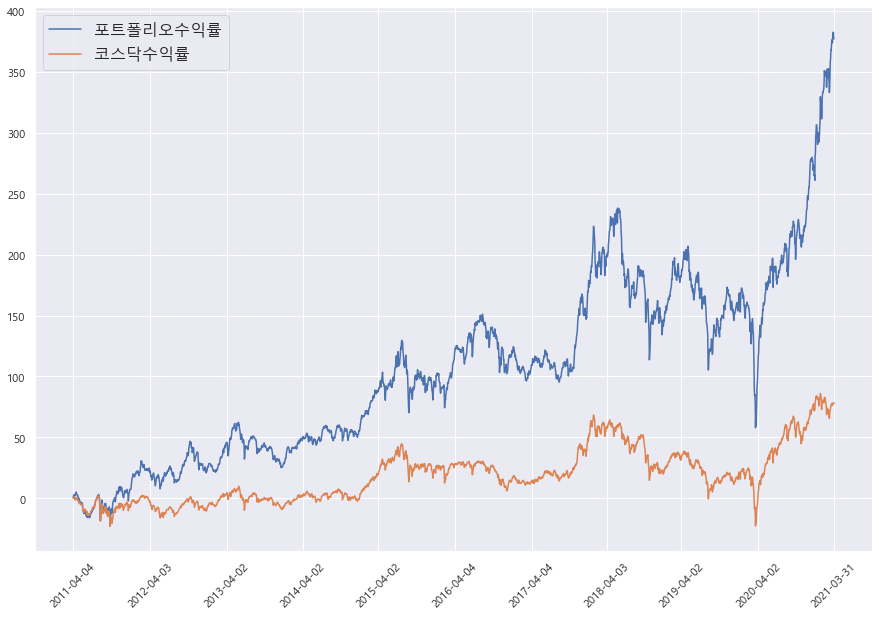

In [58]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,10))
plt.plot(stock_rtn_all["누적수익률(%)"],label='포트폴리오수익률')
plt.plot(stock_rtn_all["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,249,495,741,984,1231,1478,1719,1960,2208,2452], rotation=45)


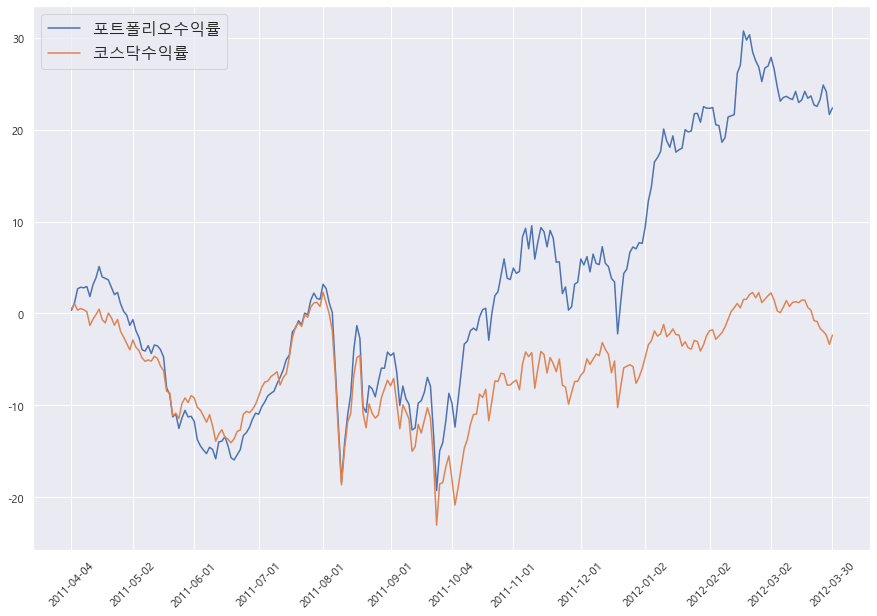

In [59]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2011["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2011["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,208,228,248], rotation=45)

plt.show()

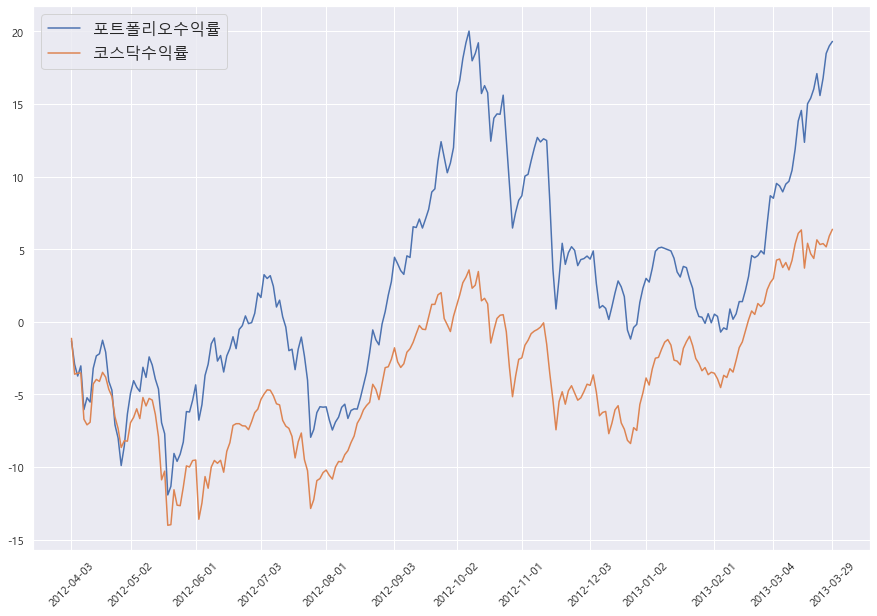

In [60]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2012["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2012["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,19,40,61,82,104,124,145,167,185,207,226,245], rotation=45)

plt.show()

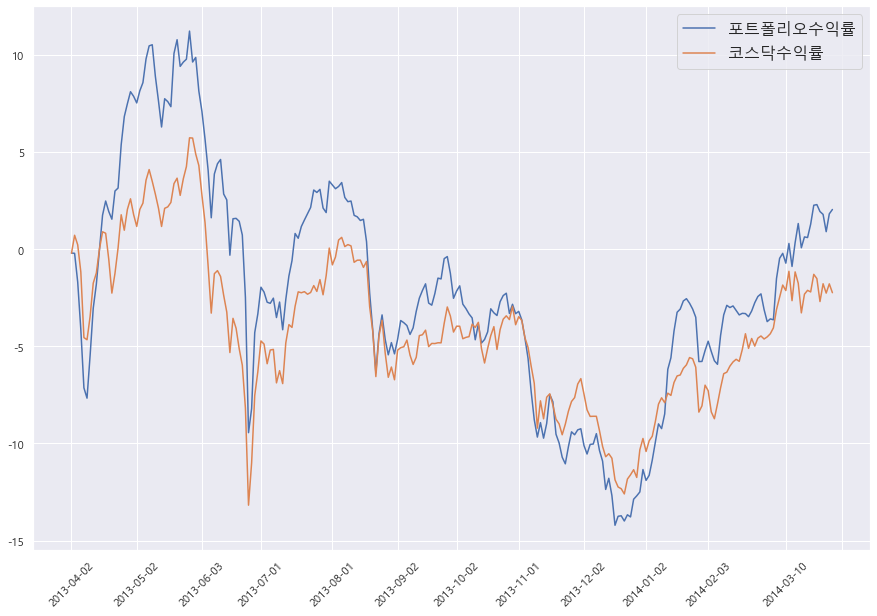

In [61]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2013["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2013["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,42,61,84,105,124,144,165,185,205,230,248], rotation=45)

plt.show()

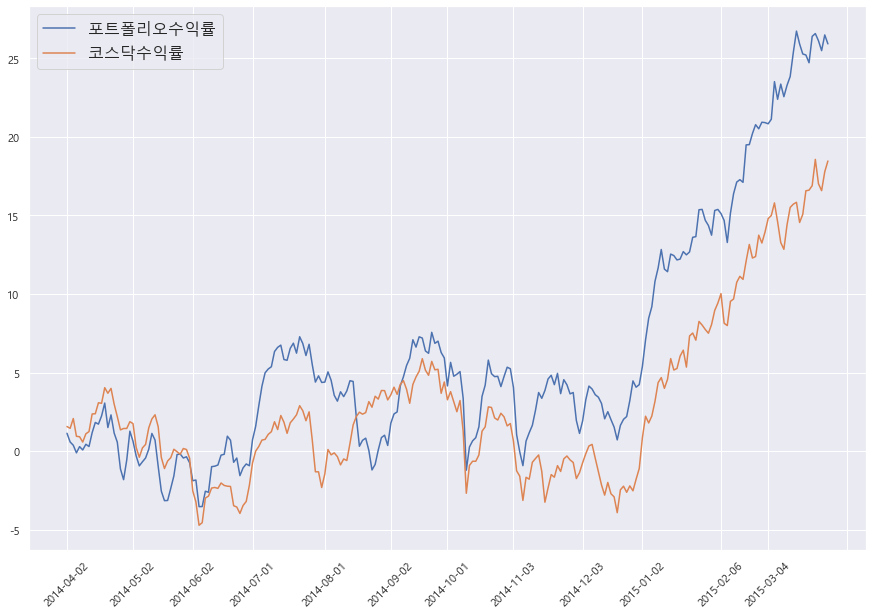

In [62]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2014["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2014["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,40,59,82,103,121,142,164,183,208,223,248], rotation=45)

plt.show()

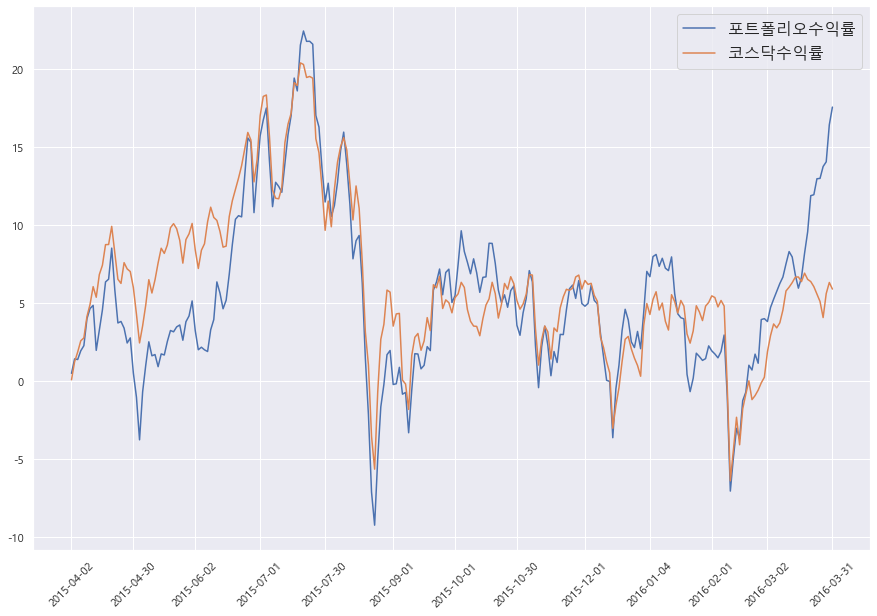

In [63]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2015["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2015["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,124,144,166,187,207,225,246], rotation=45)

plt.show()

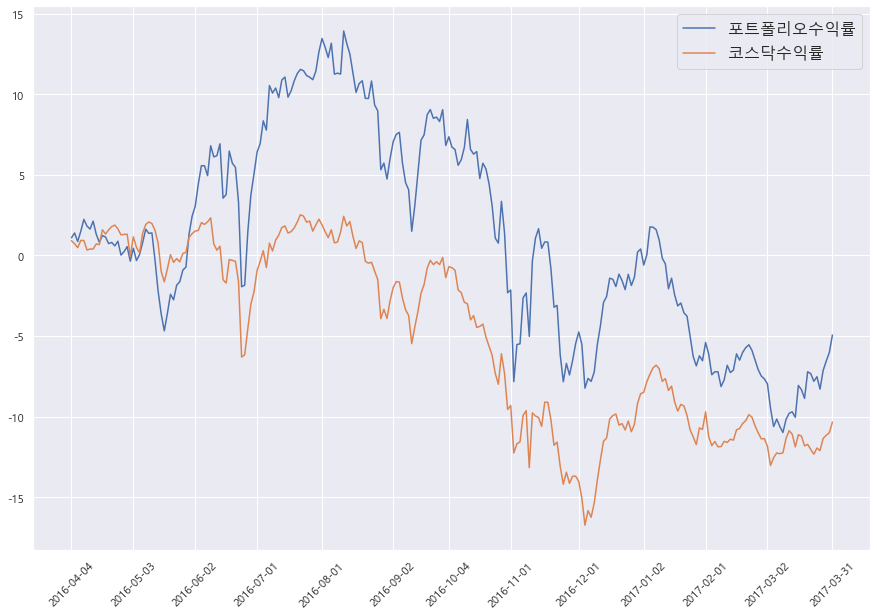

In [64]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2016["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2016["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,60,81,104,122,142,164,185,205,225,246], rotation=45)

plt.show()

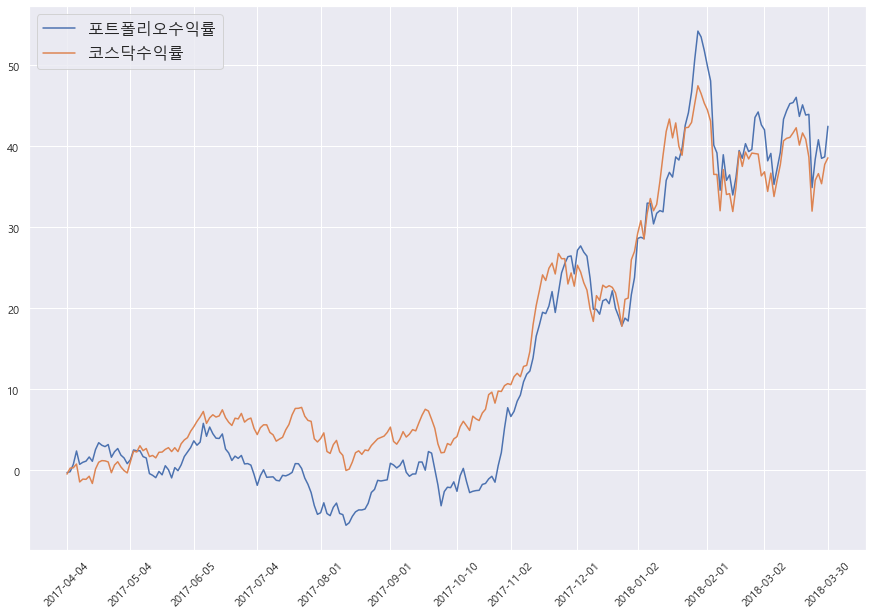

In [65]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2017["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2017["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,60,80,102,123,140,161,180,202,220,240], rotation=45)

plt.show()

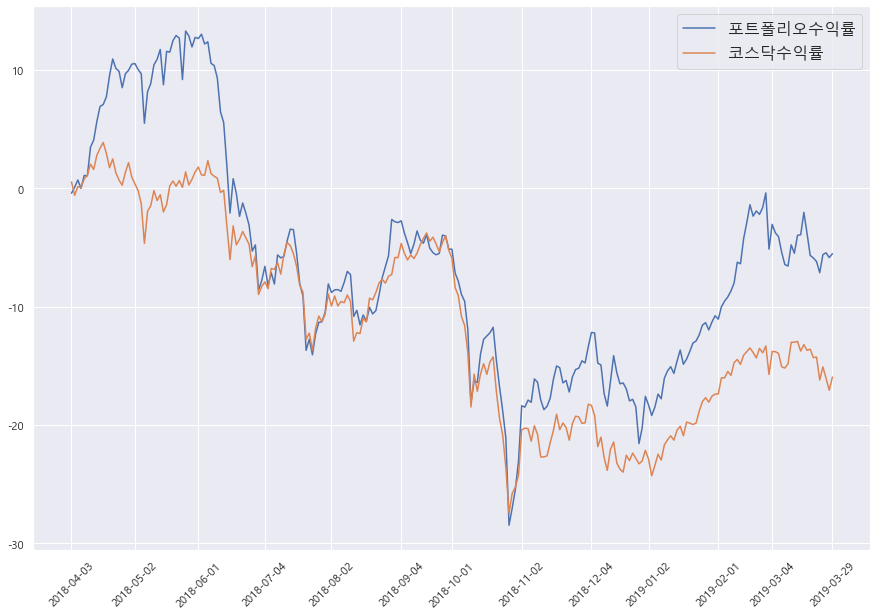

In [66]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2018["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2018["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,20,40,61,82,104,120,142,164,182,204,221,240], rotation=45)

plt.show()

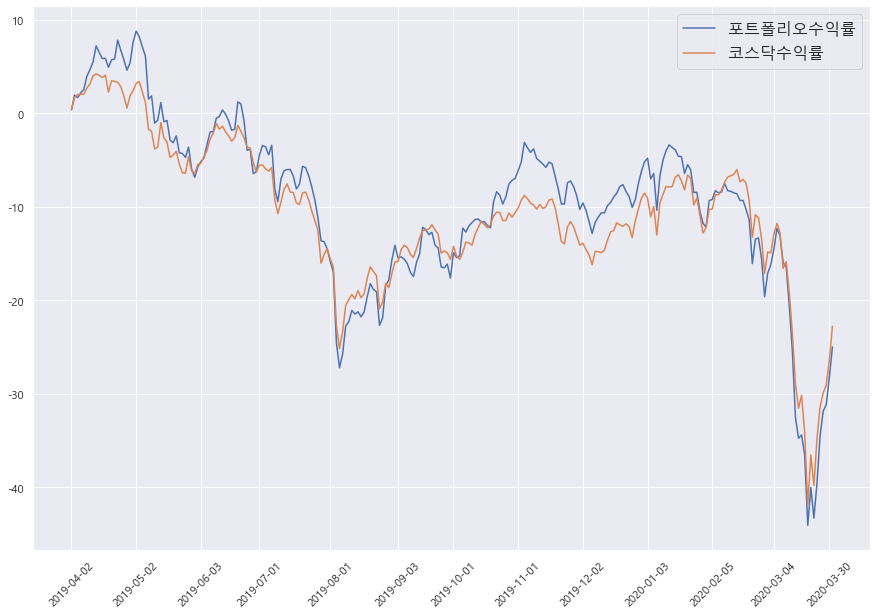

In [67]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2019["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2019["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,21,42,61,84,106,124,145,166,187,208,228,246], rotation=45)

plt.show()

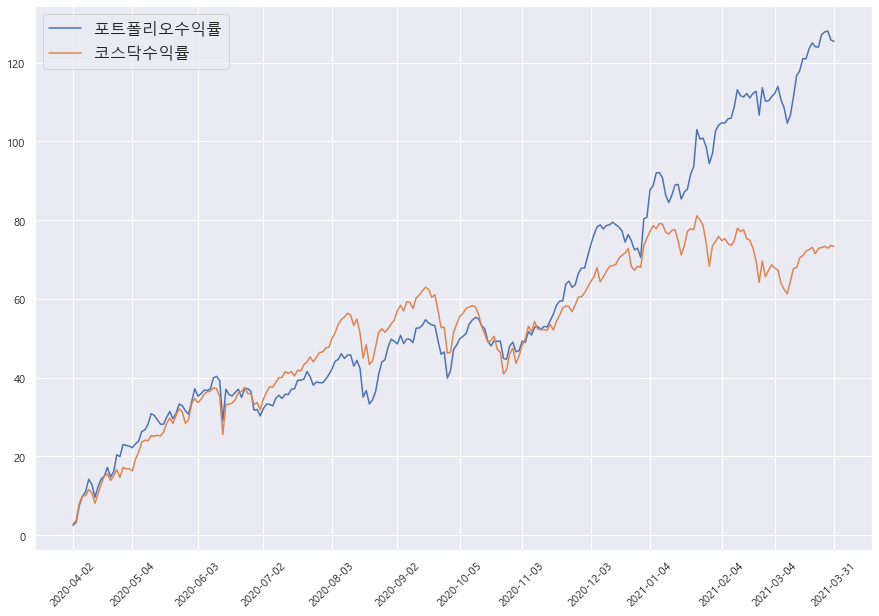

In [68]:
plt.figure(figsize=(15,10))
plt.plot(rtn_2020["연누적수익률(%)"],label='포트폴리오수익률')
plt.plot(rtn_2020["코스닥연누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)
plt.xticks([0,19,40,61,83,104,124,144,166,185,208,225,244], rotation=45)

plt.show()